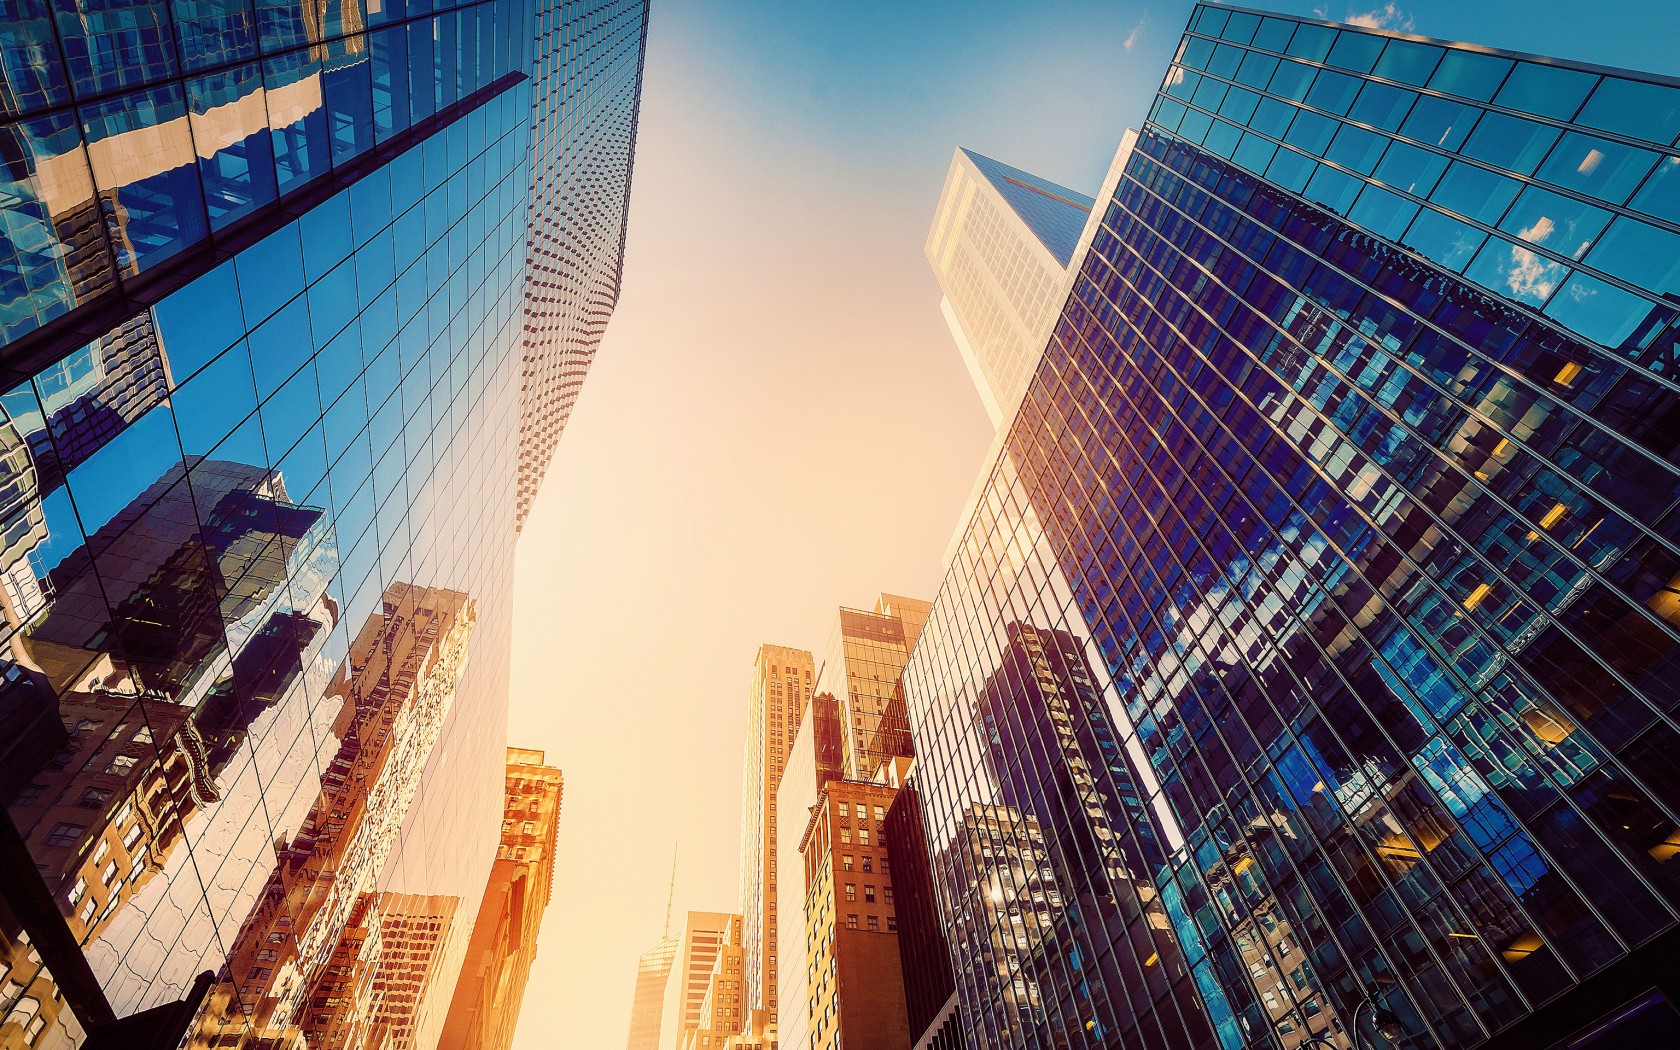



<div style="padding: 10px; border-radius: 10px;">
    <h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Main Problem Statement:</h2>
    <p style="font-size: 20px;">The objective of this project is to analyze the given dataset of real estate properties and develop a regression model to predict the price of a property based on its features. The dataset contains information on various attributes of properties, such as the number of bedrooms, bathrooms, acre lot, city, state, zip code, house size, previous sold date, and price. The main challenge is to explore the data, identify any missing values, outliers, or anomalies, preprocess the data, and select the appropriate features for developing the model.</p>
</div>


<div style="padding: 10px; border-radius: 10px;">
    <h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Report:</h2>
    <p style="font-size: 20px;">The dataset consists of 100,000 rows and nine columns. Out of which, three columns contain missing values, including bed, bath, and zip_code, and four columns contain incomplete data, including acre_lot, city, house_size, and prev_sold_date. Therefore, the first step in preprocessing the data is to handle the missing values and incomplete data, which can be done using various techniques, such as imputation, deletion, or interpolation. Once the data is cleaned, we can explore the data by visualizing the distributions of the variables, identifying outliers, and computing statistical summaries.
    </p>
</div>




<div style="padding: 10px; border-radius: 10px;">
    <h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Problem Questions:</h2>
<ul>
<li><span style="font-size:20px">What is the distribution of prices for properties in this dataset?</span></li>
<li><span style="font-size:20px">Which cities have the most expensive properties?</span></li>
<li><span style="font-size:20px">Is there a correlation between the number of bedrooms/bathrooms and the price of a property?</span></li>
<li><span style="font-size:20px">What is the average house size in different states?</span></li>
<li><span style="font-size:20px">How does the acre lot size affect the property price?</span></li>
<li><span style="font-size:20px">How has the price of a property changed over time based on previous sold date?</span></li>
<li><span style="font-size:20px">Are there any outliers or anomalies in the data that need to be addressed?</span></li>
<li><span style="font-size:20px">Which features are the most important in predicting the price of a property?</span></li>
<li><span style="font-size:20px">Can we use regression modeling to accurately predict the price of a property based on its features?</span></li>
<li><span style="font-size:20px">How do different preprocessing techniques affect the accuracy of the regression model?</span></li>
</ul>


 <p style="font-size: 20px;"
* What is the distribution of prices for properties in this dataset?
* Which cities have the most expensive properties?
* Is there a correlation between the number of bedrooms/bathrooms and the price of a property?
* What is the average house size in different states?
* How does the acre lot size affect the property price?
* How has the price of a property changed over time based on previous sold date?
* Are there any outliers or anomalies in the data that need to be addressed?
* Which features are the most important in predicting the price of a property?
* Can we use regression modeling to accurately predict the price of a property based on its features?
* How do different preprocessing techniques affect the accuracy of the regression model?</p>



 <p style="font-size: 20px;"
* What is the distribution of prices for properties in this dataset?
* Which cities have the most expensive properties?
* Is there a correlation between the number of bedrooms/bathrooms and the price of a property?
* What is the average house size in different states?
* How does the acre lot size affect the property price?
* How has the price of a property changed over time based on previous sold date?
* Are there any outliers or anomalies in the data that need to be addressed?
* Which features are the most important in predicting the price of a property?
* Can we use regression modeling to accurately predict the price of a property based on its features?
* How do different preprocessing techniques affect the accuracy of the regression model?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.csv")

In [4]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306000 entries, 0 to 305999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          306000 non-null  object 
 1   bed             250076 non-null  float64
 2   bath            251318 non-null  float64
 3   acre_lot        239877 non-null  float64
 4   city            305948 non-null  object 
 5   state           306000 non-null  object 
 6   zip_code        305803 non-null  float64
 7   house_size      252557 non-null  float64
 8   prev_sold_date  109589 non-null  object 
 9   price           306000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 23.3+ MB


In [6]:
df.shape

(306000, 10)

In [7]:
df.nunique()

status               2
bed                 36
bath                33
acre_lot          2185
city               979
state               14
zip_code          1436
house_size        4660
prev_sold_date    5299
price             3054
dtype: int64

In [8]:
df.isnull().sum()

status                 0
bed                55924
bath               54682
acre_lot           66123
city                  52
state                  0
zip_code             197
house_size         53443
prev_sold_date    196411
price                  0
dtype: int64

In [9]:
df.isnull().sum().sum()

426832

In [10]:
df.duplicated().sum()

278154

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(27846, 10)

In [13]:
df.fillna(df.mean(), inplace = True)

/tmp/ipykernel_20/2622515659.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


In [14]:
df.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                 16
state                 0
zip_code              0
house_size            0
prev_sold_date    17952
price                 0
dtype: int64

In [15]:

df.describe().corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.999994,0.137840,0.120557,-0.122488,-0.148208
bath,0.999994,1.000000,0.141353,0.124075,-0.118966,-0.144700
acre_lot,0.137840,0.141353,1.000000,0.999355,0.966097,0.959010
zip_code,0.120557,0.124075,0.999355,1.000000,0.970048,0.963557
house_size,-0.122488,-0.118966,0.966097,0.970048,1.000000,0.999551
price,-0.148208,-0.144700,0.959010,0.963557,0.999551,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27846 entries, 0 to 305709
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          27846 non-null  object 
 1   bed             27846 non-null  float64
 2   bath            27846 non-null  float64
 3   acre_lot        27846 non-null  float64
 4   city            27830 non-null  object 
 5   state           27846 non-null  object 
 6   zip_code        27846 non-null  float64
 7   house_size      27846 non-null  float64
 8   prev_sold_date  9894 non-null   object 
 9   price           27846 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.3+ MB


In [17]:
mode_df = df.mode().iloc[0]
df.fillna(mode_df, inplace=True)


In [18]:

df["city"].isnull().sum()

0

In [19]:

df.isnull().sum()

status            0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
price             0
dtype: int64

In [20]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.706419,-0.001028,-0.001794,0.112859,0.243545
bath,0.706419,1.000000,0.002517,-0.001549,0.119445,0.383043
acre_lot,-0.001028,0.002517,1.000000,0.006173,0.038049,0.016431
zip_code,-0.001794,-0.001549,0.006173,1.000000,-0.005619,-0.054508
house_size,0.112859,0.119445,0.038049,-0.005619,1.000000,0.118510
price,0.243545,0.383043,0.016431,-0.054508,0.118510,1.000000


In [21]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,2004-07-09,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,2004-07-09,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,2004-07-09,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,2004-07-09,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2292.896208,2004-07-09,65000.0


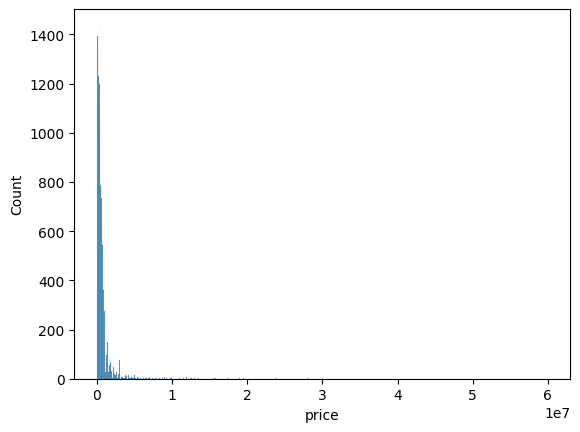

In [22]:
sns.histplot(data = df, x= "price")
plt.show()

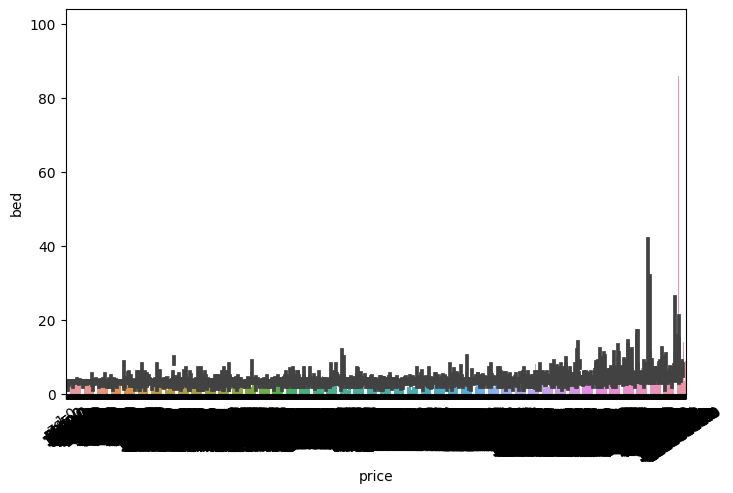

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['price'], y=df['bed'])
plt.xticks(rotation= 35)
plt.show()

In [24]:
max_price = df["price"].nlargest(10)
max_price

40599     60000000.0
221922    39500000.0
200979    30000000.0
199504    28000000.0
199512    26500000.0
2791      25000000.0
11799     24500000.0
199509    23750000.0
11292     23000000.0
11674     22500000.0
Name: price, dtype: float64